<a href="https://colab.research.google.com/github/albertodiez1980LaRioja/Prueba/blob/master/pinturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Carga de librerias
from fastai.vision import *
import os
from google.colab import files
# para calcular los tiempos de entrenamiento
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=1bb478418ab6e167fe82d94e2ceba5ade24cba0bfef6449eed85137d60b52bb0
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [2]:
!wget https://www.dropbox.com/s/g97own1uamaizgu/pinturas.zip?dl=0 -O pinturas.zip
!unzip pinturas.zip

--2020-04-27 20:59:44--  https://www.dropbox.com/s/g97own1uamaizgu/pinturas.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/g97own1uamaizgu/pinturas.zip [following]
--2020-04-27 20:59:44--  https://www.dropbox.com/s/raw/g97own1uamaizgu/pinturas.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc83aab5701ad285491574883853.dl.dropboxusercontent.com/cd/0/inline/A2pg10jknogbErGNxvzLun1uPHwJ4cb8g4oZsGSmyvea3oj2XNWFGFAythQj8dfs-1Htj5h2P_r0tcJJ5vS7Ed78weDriN5UV-CFE0ljOM4mjabn1IecvXHe4rSUMO73guA/file# [following]
--2020-04-27 20:59:45--  https://uc83aab5701ad285491574883853.dl.dropboxusercontent.com/cd/0/inline/A2pg10jknogbErGNxvzLun1uPHwJ4cb8g4oZsGSmyvea3oj2XNWFGFAythQj8dfs-1Htj5h2P_r0tcJJ5vS7Ed78weDriN5UV-CFE0ljOM

In [3]:
# eliminamos las que no se pueden abrir
path = Path('')
for c in ['pinturas/1','pinturas/2','pinturas/3','pinturas/4','pinturas/5']:
  #print(c)
  print(path/c)
  verify_images(path/c,delete=True,max_size=500)
  # parece que todas son validas

pinturas/1


pinturas/2


pinturas/3
pinturas/4


pinturas/5


time: 9.26 s


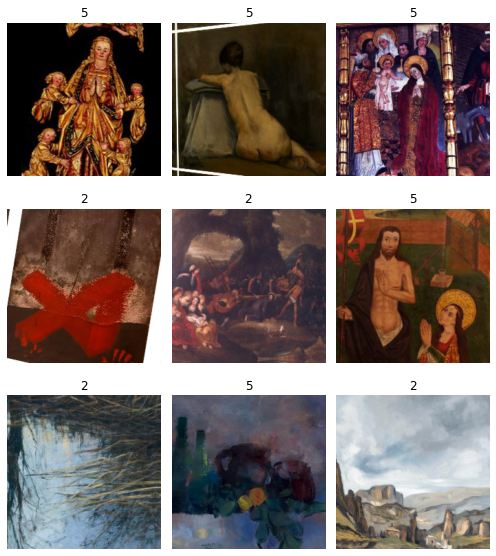

time: 12.3 s


In [4]:
# mostramos unas imagenes de prueba
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3,figsize=(7,8))

In [5]:
# creamos el modelo de prediccion
learn = create_cnn(data,models.resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth



time: 8.65 s


In [6]:
# entrenamos la red
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.558894,4.429484,0.823529,0.176471,00:02
1,2.310740,3.001869,0.705882,0.294118,00:01
2,1.969035,2.393114,0.529412,0.470588,00:01
3,1.717892,2.105880,0.529412,0.470588,00:01


time: 7.61 s


In [7]:
# lo guardamos
learn.save('stage-1')

time: 119 ms


In [8]:
# lo descongelamos
learn.unfreeze()

time: 2.34 ms


In [9]:
# lo reentrenamos
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.080261,1.931059,0.470588,0.529412,00:01
1,0.966583,1.768559,0.470588,0.529412,00:01
2,0.876443,1.698052,0.470588,0.529412,00:01
3,0.777500,1.655680,0.411765,0.588235,00:01


time: 7.4 s


In [10]:
learn.save('stage-2')

time: 455 ms


In [11]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (17 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
5,2,5,5,2
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (co

time: 453 ms


In [12]:
# toca reinterpretar los resultados
interp = ClassificationInterpretation.from_learner(learn)

time: 430 ms


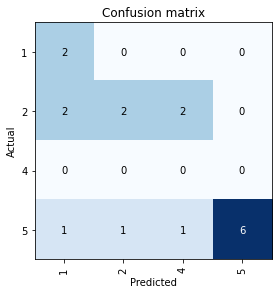

time: 216 ms


In [13]:
interp.plot_confusion_matrix()
# no es muy atrayente, si las edades son consecutivas tampoco anda tan equivocado

In [14]:
from fastai.widgets import *
ds, idxs = DatasetFormatter().from_toplosses(learn,ds_type=DatasetType.Valid)
ds.to_df().iloc[idxs[:10]] # las 10 imagenes con mayor perdida

,x,y
64,pinturas/2/11712.jpg,2
52,pinturas/2/5157.jpg,2
57,pinturas/2/9168.jpg,2
43,pinturas/2/9145.jpg,2
32,pinturas/5/30877.jpg,5
46,pinturas/2/11697.jpg,2
10,pinturas/5/30876.jpg,5
51,pinturas/2/5154.jpg,2
50,pinturas/2/9512.jpg,2
37,pinturas/2/9169.jpg,2


time: 1.37 s


In [15]:
learn.export()
!ls
learn2 = load_learner(".")

export.pkl  models  pinturas  pinturas.zip  sample_data
time: 3.37 s
